# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [117]:
datapath = "~/teigen_data/output_rows.csv"

In [82]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [83]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'datetime', u'length [mm]', u'volume [mm^3]', u'surface [mm^2]',
       u'area volume [mm^3]', u'count []', u'numeric volume [mm^3]',
       u'numeric surface [mm^2]', u'length d. [mm^-2]', u'volume d. []',
       u'surface d. [mm^-1]', u'appearance noise_preview',
       u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes r

In [84]:
df

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing limit_negative_intensities,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_exponent,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype
0,2017-05-17T16:10:13.383914,174.746094,51314.923297,15169.470172,1100000.0,10.0,41119.575512,14162.654498,0.000159,0.04665,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
1,2017-05-17T16:10:16.410858,174.746094,51314.923297,15169.470172,1100000.0,10.0,53720.070202,16805.670338,0.000159,0.04665,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
2,2017-05-17T16:10:19.025207,174.746094,51314.923297,15169.470172,1100000.0,10.0,44652.780386,14904.779950,0.000159,0.04665,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
3,2017-05-17T16:10:21.589362,174.746094,51314.923297,15169.470172,1100000.0,10.0,48910.073188,15801.267461,0.000159,0.04665,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
4,2017-05-17T16:10:24.068960,174.746094,51314.923297,15169.470172,1100000.0,10.0,47059.210286,15411.214032,0.000159,0.04665,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
5,2017-05-17T16:10:27.095086,174.746094,51314.923297,15169.470172,1100000.0,10.0,45400.532803,14525.978490,0.000159,0.04665,...,True,8,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
6,2017-05-17T16:10:29.824832,174.746094,51314.923297,15169.470172,1100000.0,10.0,52488.034850,15979.590915,0.000159,0.04665,...,True,8,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
7,2017-05-17T16:10:32.738553,174.746094,51314.923297,15169.470172,1100000.0,10.0,47550.177952,14963.954013,0.000159,0.04665,...,True,8,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
8,2017-05-17T16:10:35.529418,174.746094,51314.923297,15169.470172,1100000.0,10.0,49936.406098,15454.899990,0.000159,0.04665,...,True,8,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
9,2017-05-17T16:10:38.386064,174.746094,51314.923297,15169.470172,1100000.0,10.0,48829.729909,15226.945610,0.000159,0.04665,...,True,8,False,40.0,0.0001,0.1,3.0,30.0,0,uint8


In [118]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [86]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:

sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [ ]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [ ]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
# dfsp

In [ ]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
dfsp.plot(
    x="length_distribution_mean", **plotkw)
dfsp

In [ ]:
import seaborn as sns

In [ ]:
pd.__path__

In [ ]:
pd.__version__

In [121]:
## element_number = 10, 
df["output note"]

0                 compensation method 1 sphere inscribed
1             compensation method 1 sphere circumscribed
2          compensation method 1 sphere cylinder surface
3           compensation method 1 sphere cylinder volume
4                   compensation method 1 sphere average
5                 compensation method 1 sphere inscribed
6             compensation method 1 sphere circumscribed
7          compensation method 1 sphere cylinder surface
8           compensation method 1 sphere cylinder volume
9                   compensation method 1 sphere average
10                compensation method 1 sphere inscribed
11            compensation method 1 sphere circumscribed
12         compensation method 1 sphere cylinder surface
13          compensation method 1 sphere cylinder volume
14                  compensation method 1 sphere average
15                compensation method 1 sphere inscribed
16            compensation method 1 sphere circumscribed
17         compensation method 

## Compensation methods

### 1 sphere

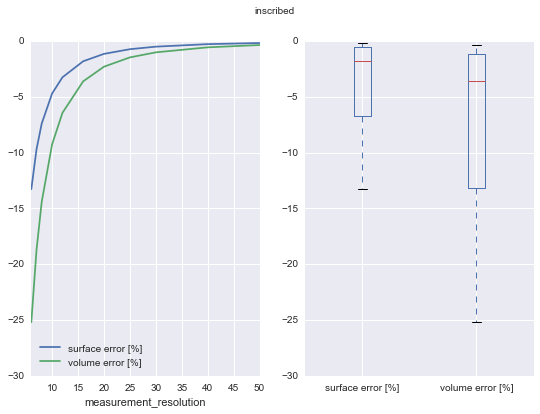

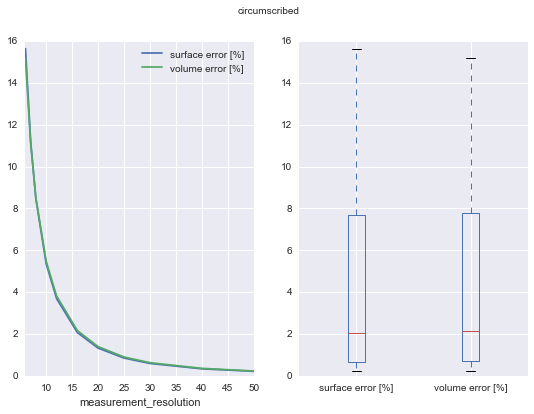

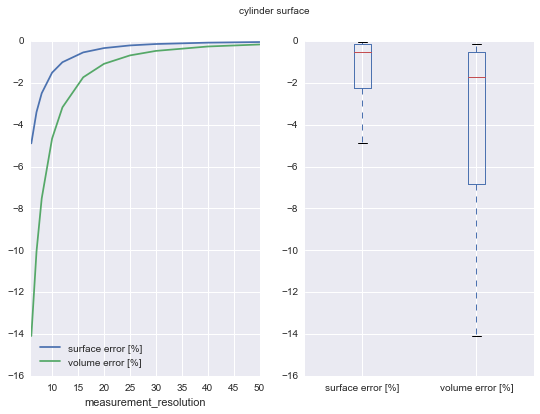

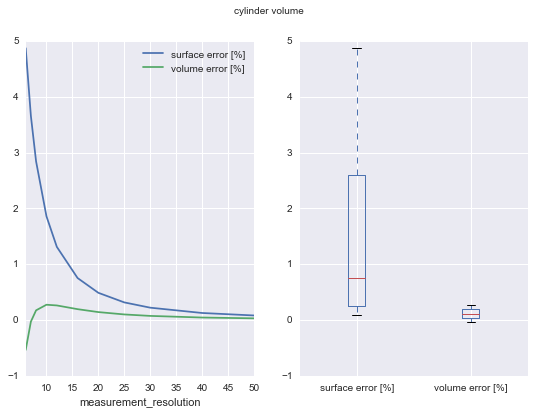

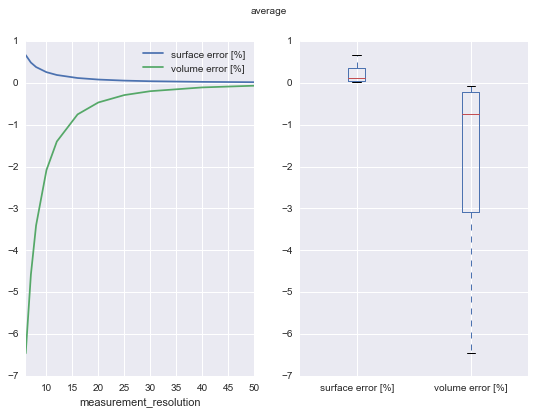

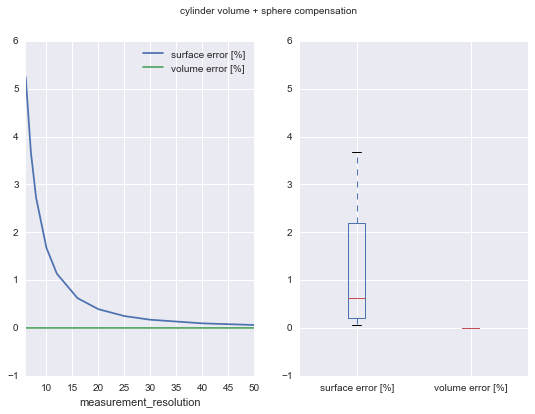

In [123]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


### Tubes

TypeError: Empty 'DataFrame': no numeric data to plot

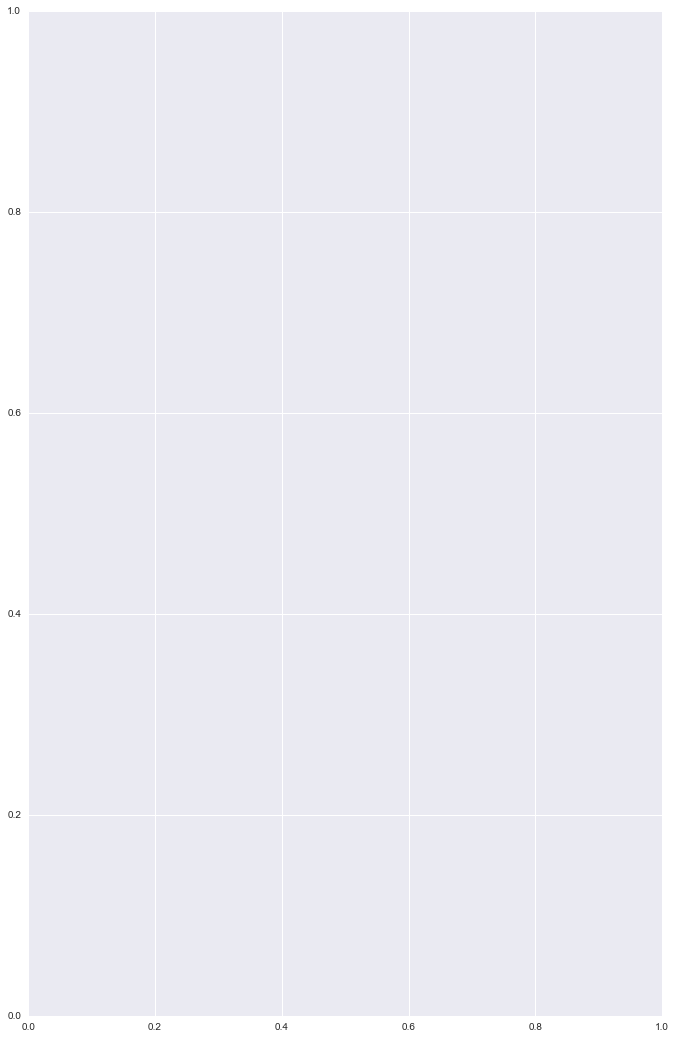

In [124]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


### Radius estimation

In [97]:
dfs[["volume [mm^3]"]]

,volume [mm^3]
4,36865.137621
9,36865.137621
14,36865.137621
19,36865.137621
24,36865.137621
29,36865.137621


In [ ]:
### Kontrolní výpočet objemu

In [102]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [105]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [106]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [ ]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["element_number"] = df["generators Unconnected tubes element_number"]
df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["measurement_resolution"] == 25
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]", "element_number", "length_distribution_mean", "radius_distribution_mean"]]
dfsp

In [ ]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [ ]:
sns.

In [ ]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [ ]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [ ]:
dfsp.describe()

# Statistics

## Surface

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["surface [mm^2]"], y=dfsp["numeric surface [mm^2]"], correction=False, zero_method="pratt")

In [ ]:
scipy.stats.wilcoxon(dfsp["surface error [%]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["surface [mm^2]"], dfsp["numeric surface [mm^2]"])

## Volume

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["volume [mm^3]"], y=dfsp["numeric volume [mm^3]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["volume [mm^3]"], dfsp["numeric volume [mm^3]"])

In [ ]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


In [ ]:
np.cos(np.pi/2)